Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [52]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [53]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

Populating the interactive namespace from numpy and matplotlib


### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [54]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
polynomial_features = PolynomialFeatures(1)
matDiz = polynomial_features.fit_transform(X)
matDiz

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [55]:
from numpy import linalg
# Vaš kôd ovdje
težina = linalg.inv(numpy.transpose(matDiz).dot(matDiz)).dot(numpy.transpose(matDiz)).dot(y)
težina2 = np.dot(np.linalg.pinv(matDiz), y)
težina, težina2

(array([2.2       , 0.45714286]), array([2.2       , 0.45714286]))

Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

Razlika u greškama: 


(4.085714285714285, 2.0428571428571427)

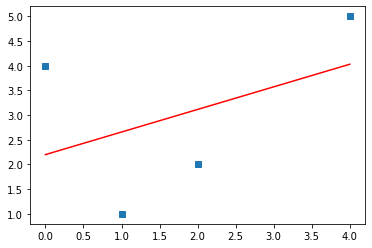

In [56]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
h = np.dot(težina, numpy.transpose(matDiz))
plt.plot(X, y, "s", X, h, "r")
mean_squared_error(y,h)
suma = 0
for s in range(len(X)):
    suma += np.power((y[s] - h[s]),2)
print ("Razlika u greškama: ")
suma/2, mean_squared_error(y,h)

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [57]:
# Vaš kôd ovdje
try:
    linalg.inv(matDiz).dot(y)
except:
    print("Dimenzije matrica nisu kompatibilne")

Dimenzije matrica nisu kompatibilne


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [58]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
noveTežine = LinearRegression().fit(X, y)
print(noveTežine.intercept_, noveTežine.coef_)
print(noveTežine.predict(X))

2.2 [0.45714286]
[2.2        2.65714286 3.11428571 4.02857143]


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [63]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    return f(X) + normal(0, noise, size(X))

In [64]:
# Vaš kôd ovdje
f = lambda x: 5 + x - 2*pow(x,2) - 5*pow(x,3)
X = linspace(-5, 5, 50)
y = make_labels(X, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

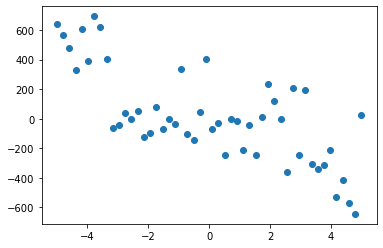

In [65]:
# Vaš kôd ovdje
scatter(X, y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Pogreška = 37905.66352613666



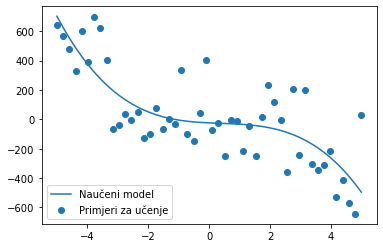

In [66]:
# Vaš kôd ovdje
from sklearn.preprocessing import PolynomialFeatures
matDiz = PolynomialFeatures(3).fit_transform(X.reshape(-1,1))
težina = np.dot(np.linalg.pinv(matDiz), y)
h = dot(matDiz, težina)
err = mean_squared_error(y,h)
print("Pogreška = " + str(err) + "\n")

scatter(X, y, label = "Primjeri za učenje")
plot(X, h, label = "Naučeni model")
legend(loc = 'lower left');

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Pogreška = 47239.90753654473

Pogreška = 37905.66352613666

Pogreška = 34490.245027845725

Pogreška = 24369.05749194011

Pogreška = 20035.129918190396



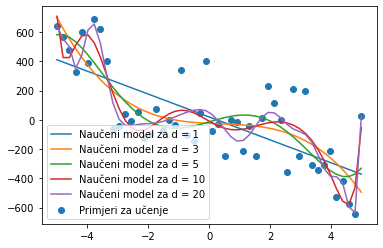

In [67]:
# Vaš kôd ovdje
d = [1,3,5,10,20]
for i in d:
    matDiz = PolynomialFeatures(i).fit_transform(X.reshape(-1,1))
    težina = np.dot(np.linalg.pinv(matDiz), y)
    h = dot(matDiz, težina)
    err = mean_squared_error(y,h)
    print("Pogreška = " + str(err) + "\n")

    plot(X, h, label = "Naučeni model za d = " + str(i))
scatter(X, y, label = "Primjeri za učenje")
legend(loc = 'lower left');

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

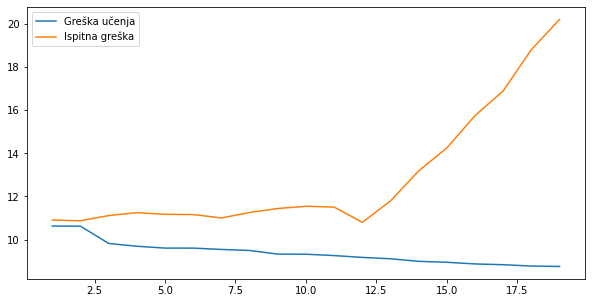

In [70]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
trainGreške = []
testGreške = []

d = range(1,20)

for i in range(1,20):
    matDiz1 = PolynomialFeatures(i).fit_transform(X_train.reshape(-1,1))
    matDiz2 = PolynomialFeatures(i).fit_transform(X_test.reshape(-1,1))
    težina = np.dot(np.linalg.pinv(matDiz1), y_train)
    h1 = dot(matDiz1, težina)
    h2 = dot(matDiz2, težina)
    err1 = mean_squared_error(y_train,h1)
    err2 = mean_squared_error(y_test,h2)
    trainGreške.insert(i, np.log(err1))
    testGreške.insert(i, np.log(err2))

plt.figure(figsize=(10,5))
plot(d, trainGreške, label="Greška učenja")
plot(d, testGreške, label="Ispitna greška")
legend(loc = 'upper left');

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

***Q:*** Jesu li rezultati očekivani? Obrazložite.

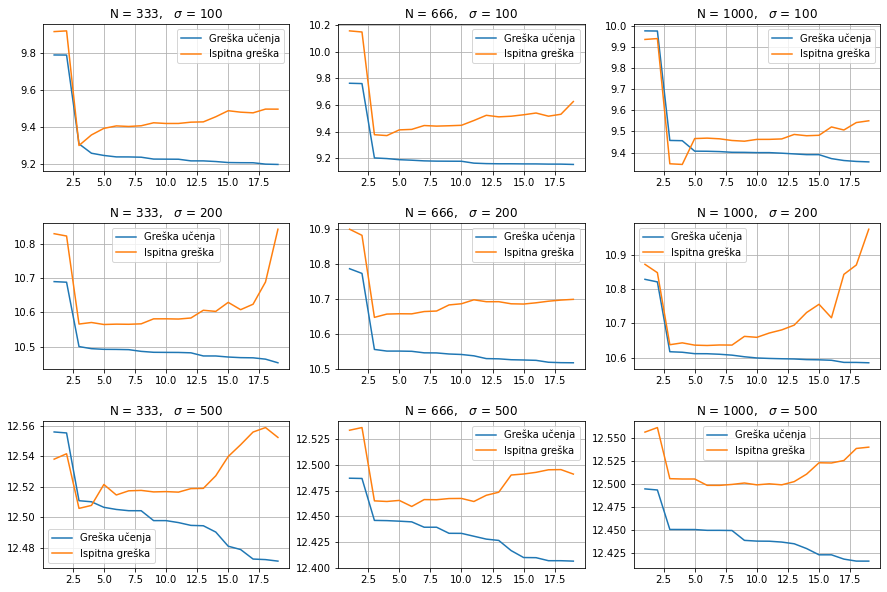

In [71]:
# Vaš kôd ovdje
import random
šum = [100, 200, 500]
N = [1/3,2/3,3/3]

X_novi = linspace(-5, 5, 1000)
X_train, X_test = train_test_split(X_novi, test_size = 0.5)

X_train_novi = [[],[],[],[],[],[],[],[],[]];
X_test_novi = [[],[],[],[],[],[],[],[],[]];
y_train_novi = [[],[],[],[],[],[],[],[],[]];
y_test_novi = [[],[],[],[],[],[],[],[],[]];
trainGreškeUk = []
testGreškeUk = []


d = range(1,20)

for i in range(0,3):
    y_tmp_train = make_labels(X_train, f, šum[i])
    y_tmp_test = make_labels(X_test, f, šum[i])
    for k in range(0,3):
        if (i == 0):
            temp = random.sample(list([c for c in range(500)]), 166)
            for m in range(len(temp)):
                X_train_novi[i*3+k].append(X_train[temp[m]])
                X_test_novi[i*3+k].append(X_test[temp[m]])
                y_train_novi[i*3+k].append(y_tmp_train[temp[m]])
                y_test_novi[i*3+k].append(y_tmp_test[temp[m]])
        elif (i == 1):
            temp = random.sample(list([c for c in range(500)]), 333)
            for m in range(len(temp)):
                X_train_novi[i*3+k].append(X_train[temp[m]])
                X_test_novi[i*3+k].append(X_test[temp[m]])
                y_train_novi[i*3+k].append(y_tmp_train[temp[m]])
                y_test_novi[i*3+k].append(y_tmp_test[temp[m]])
        elif(i == 2):
            temp = random.sample(list([c for c in range(500)]), 400)
            for m in range(len(temp)):
                X_train_novi[i*3+k].append(X_train[temp[m]])
                X_test_novi[i*3+k].append(X_test[temp[m]])
                y_train_novi[i*3+k].append(y_tmp_train[temp[m]])
                y_test_novi[i*3+k].append(y_tmp_test[temp[m]])
                

for j in range(0,9):
    
    trainGreške = []
    testGreške = []
    X_train_temp = X_train_novi[j]
    X_test_temp = X_test_novi[j]
    
    for i in d:
        matDiz1 = PolynomialFeatures(i).fit_transform(np.array(X_train_temp).reshape(-1,1))
        matDiz2 = PolynomialFeatures(i).fit_transform(np.array(X_test_temp).reshape(-1,1))
        težina = np.dot(np.linalg.pinv(matDiz1), y_train_novi[j])
        h1 = dot(matDiz1, težina)
        h2 = dot(matDiz2, težina)
        err1 = mean_squared_error(y_train_novi[j],h1)
        err2 = mean_squared_error(y_test_novi[j],h2)
        trainGreške.insert(i, np.log(err1))
        testGreške.insert(i, np.log(err2))
        
    trainGreškeUk.append(trainGreške)
    testGreškeUk.append(testGreške)
    

fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(wspace=0.2, hspace = 0.35)
for i in range(0,3):
    for k in range(0,3):
        graf = fig.add_subplot(3, 3, i*3+k+1)
        plot(d, trainGreškeUk[i*3+k], label="Greška učenja")
        plot(d, testGreškeUk[i*3+k], label="Ispitna greška")
        plt.title('N = %d,   $\sigma$ = %d' % (1000*N[k], šum[i]) )
        legend(loc = 'best');
        graf.grid()



### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [72]:
# Vaš kôd ovdje
lambd = [0,1,10]
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
matDiz = PolynomialFeatures(3).fit_transform(X)
izraz = lambda l: np.dot(np.dot(np.linalg.inv(np.dot(matDiz.T, matDiz) + np.dot(l, np.eye(4))), matDiz.T), y);
print(izraz(lambd[0]), izraz(lambd[1]), izraz(lambd[2]))

[ 4.         -5.91666667  3.375      -0.45833333] [ 1.79567372 -0.24729075 -0.0175289   0.07014758] [0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [73]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
print(Ridge(0, fit_intercept=False).fit(matDiz,y).coef_)
print(Ridge(1, fit_intercept=False).fit(matDiz,y).coef_)
print(Ridge(10, fit_intercept=False).fit(matDiz,y).coef_)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[0.43312265 0.11060671 0.13827839 0.03093411]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

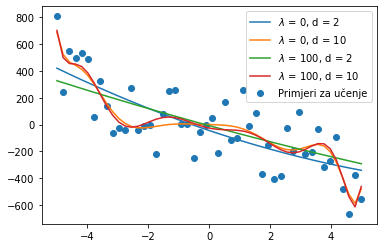

In [74]:
# Vaš kôd ovdje
X = linspace(-5, 5, 50)
Y_t = make_labels(X, f, 200)
rješenje = []


matDiz1 = PolynomialFeatures(2).fit_transform(np.array(X).reshape(-1,1))
težina1 = np.dot(np.dot(np.linalg.inv(np.dot(matDiz1.T, matDiz1) + np.dot(0, np.eye(2+1))), matDiz1.T), Y_t);
h1 = np.dot(matDiz1, težina1)
rješenje.append(h1)
        
matDiz2 = PolynomialFeatures(10).fit_transform(np.array(X).reshape(-1,1))
težina2 = np.dot(np.dot(np.linalg.inv(np.dot(matDiz2.T, matDiz2) + np.dot(100, np.eye(10+1))), matDiz2.T), Y_t);
h2 = np.dot(matDiz2, težina2)
rješenje.append(h2)
        
matDiz3 = PolynomialFeatures(2).fit_transform(np.array(X).reshape(-1,1))
težina3 = np.dot(np.dot(np.linalg.inv(np.dot(matDiz3.T, matDiz3) + np.dot(100, np.eye(2+1))), matDiz3.T), Y_t);
h3 = np.dot(matDiz3, težina3)
rješenje.append(h3)
        
matDiz4 = PolynomialFeatures(10).fit_transform(np.array(X).reshape(-1,1))
težina4 = np.dot(np.dot(np.linalg.inv(np.dot(matDiz4.T, matDiz4) + np.dot(0, np.eye(10+1))), matDiz4.T), Y_t);
h4 = np.dot(matDiz4, težina4)
rješenje.append(h4)

lam = [0,100]
d = [2,10]

for i in range(len(lam)):
    for j in range(len(d)):
        plot(X, rješenje[i*2+j], label = "$\lambda$ = " + str(lam[i]) + ", d = " + str(d[j]))
scatter(X, Y_t, label = "Primjeri za učenje")
legend(loc = 'best');

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


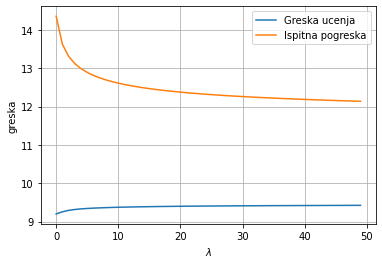

In [75]:
# Vaš kôd ovdje
X = linspace(-5, 5, 50)
y = make_labels(X, f, 200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
trainGreške = []
testGreške = []

lamb = range(0,50)

for i in lamb:
    matDiz1 = PolynomialFeatures(10).fit_transform(X_train.reshape(-1,1))
    matDiz2 = PolynomialFeatures(10).fit_transform(X_test.reshape(-1,1))
    težina = np.dot(np.dot(np.linalg.inv(np.dot(matDiz1.T, matDiz1) + np.dot(i, np.eye(10+1))), matDiz1.T), y_train);
    h1 = dot(matDiz1, težina)
    h2 = dot(matDiz2, težina)
    err1 = mean_squared_error(y_train,h1)
    err2 = mean_squared_error(y_test,h2)
    trainGreške.insert(i, np.log(err1))
    testGreške.insert(i, np.log(err2))

plt.plot(lamb, trainGreške, lamb, testGreške);
plt.grid(), plt.xlabel('$\lambda$'), plt.ylabel('greska');
plt.legend(['Greska ucenja', 'Ispitna pogreska'], loc='best');


### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [76]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

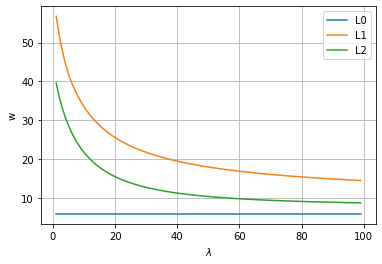

In [77]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
X = linspace(-5, 5, 50)
y = make_labels(X, f, 200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
L2 = []
L1 = []
L0 = []

lamb = range(1,100)
matDiz1 = PolynomialFeatures(5).fit_transform(X_train.reshape(-1,1))


for i in lamb:
    težina = np.dot(np.dot(np.linalg.inv(np.dot(matDiz1.T, matDiz1) + np.dot(i, np.eye(5+1))), matDiz1.T), y_train);
    L0.append(nonzeroes(težina))
    L1.append(sum(abs(težina)))
    L2.append(math.sqrt(np.dot(težina.T, težina)))

#print(L2)

plot(lamb, L0, lamb, L1, lamb, L2);
grid(), plt.xlabel('$\lambda$'), plt.ylabel('w');
legend(['L0', 'L1', 'L2'], loc='best');

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

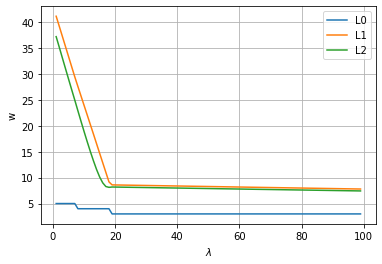

In [78]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

L2b = []
L1b = []
L0b = []
    

for i in lamb:
    lass = Lasso(i).fit(matDiz1, y_train)
    težina = lass.coef_
    L0b.append(nonzeroes(težina))
    L1b.append(sum(abs(težina)))
    L2b.append(math.sqrt(np.dot(težina.T, težina)))

plot(lamb, L0b, lamb, L1b, lamb, L2b);
grid(), plt.xlabel('$\lambda$'), plt.ylabel('w');
legend(['L0', 'L1', 'L2'], loc='best');

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [79]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

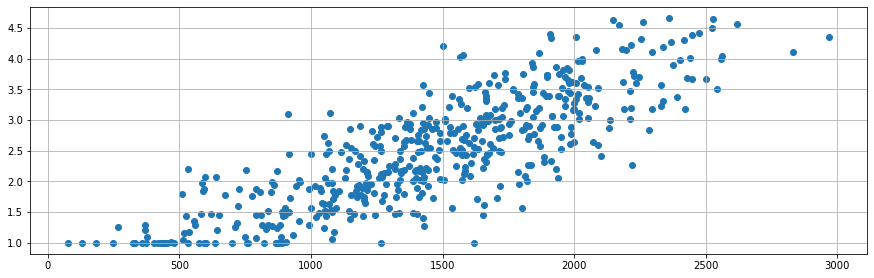

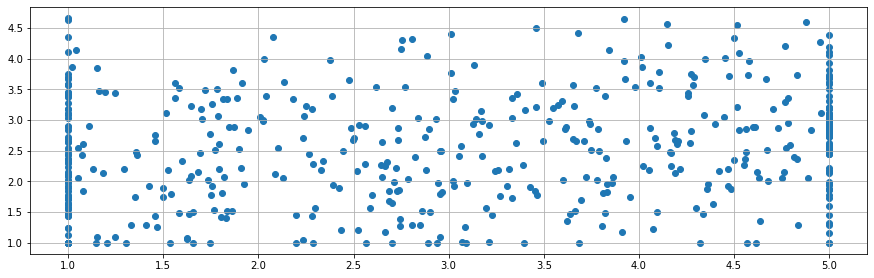

In [80]:
# Vaš kôd ovdje
mat1 = []
mat2 = []
for i in range(0,500):
    mat1.append([grades_X[i][0]])
    mat2.append([grades_X[i][1]])


fig = plt.figure(figsize=(15, 10))
graf = fig.add_subplot(211)
graf.scatter(mat1, grades_y)
graf.grid()

fig = plt.figure(figsize=(15, 10))
graf = fig.add_subplot(212)
graf.scatter(mat2, grades_y)
graf.grid()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [85]:
# Vaš kôd ovdje

h = Ridge(0.01).fit(grades_X, grades_y)
print(h.intercept_, h.coef_)


0.15061179575776018 [0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [86]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje

grades_X_fixed = StandardScaler().fit_transform(grades_X)

grades_y_fixed = StandardScaler().fit_transform(grades_y.reshape(-1,1))

h = Ridge(0.01).fit(grades_X_fixed, grades_y_fixed)
print(h.intercept_, h.coef_)

[8.62551331e-17] [[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [87]:
# Vaš kôd ovdje
grades_X_fixed_colinear = []
for i in range(0,500):
    grades_X_fixed_colinear.append([grades_X_fixed[i][0], grades_X_fixed[i][1], grades_X_fixed[i][1]])



Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [88]:
# Vaš kôd ovdje
h = Ridge(0.01).fit(grades_X_fixed_colinear, grades_y_fixed)
print(h.intercept_, h.coef_)

[8.07031579e-17] [[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [89]:
# Vaš kôd ovdje
stddev = []
w_vektor1 = []
w_vektor2 = []
indexi = [c for c in range(500)]
for i in range(0,10):
    indexi[i]
    indexi_temp = random.sample(indexi, 250)
    grades_X_fixed_colinear_pola = []
    grades_y_fixed_pola = []
    for j in indexi_temp:
        grades_X_fixed_colinear_pola.append(grades_X_fixed_colinear[j])
        grades_y_fixed_pola.append((grades_y_fixed[j]))
    h1 = Ridge(0.01).fit(grades_X_fixed_colinear_pola, grades_y_fixed_pola)
    h2 = Ridge(1000).fit(grades_X_fixed_colinear_pola, grades_y_fixed_pola)
    w_vektor1.append(h1)
    w_vektor2.append(h2)
    
print("Lambda = 0.01")
std1 = []
std2 = []
for i in w_vektor1:
    print(i.coef_)
    std1.append(i.coef_)
print("std dev")
print(np.std(std1, axis = 0))
print("Lambda = 1000")
for i in w_vektor2:
    print(i.coef_)
    std2.append(i.coef_)
print("std dev")
print(np.std(std2, axis = 0))

Lambda = 0.01
[[0.83100011 0.06571899 0.06571899]]
[[0.78717723 0.0890576  0.0890576 ]]
[[0.79889096 0.08528824 0.08528824]]
[[0.83566249 0.08277449 0.08277449]]
[[0.86038392 0.06237236 0.06237236]]
[[0.82120301 0.09264977 0.09264977]]
[[0.77020266 0.08458093 0.08458093]]
[[0.80428527 0.06423762 0.06423762]]
[[0.82842215 0.05738434 0.05738434]]
[[0.7761284  0.08618552 0.08618552]]
std dev
[[0.02737373 0.01234123 0.01234123]]
Lambda = 1000
[[0.16774069 0.03228842 0.03228842]]
[[0.15551871 0.03209977 0.03209977]]
[[0.15600778 0.04052062 0.04052062]]
[[0.16301767 0.03778003 0.03778003]]
[[0.16577869 0.02923549 0.02923549]]
[[0.16716817 0.04085719 0.04085719]]
[[0.15721255 0.03630781 0.03630781]]
[[0.15851995 0.02211349 0.02211349]]
[[0.16431031 0.02482006 0.02482006]]
[[0.16467267 0.03462607 0.03462607]]
std dev
[[0.00447665 0.00596325 0.00596325]]


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.